In [90]:
import numpy as np
import pandas as pd
import tensorflow as tf
import sklearn as sk
from sklearn.model_selection import train_test_split
from tensorflow import keras
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [91]:
data = pd.read_csv("D:/HousingData.csv")
data.dropna(inplace=True)

In [92]:
data.head(50)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5
10,0.22489,12.5,7.87,0.0,0.524,6.377,94.3,6.3467,5,311,15.2,392.52,20.45,15.0
11,0.11747,12.5,7.87,0.0,0.524,6.009,82.9,6.2267,5,311,15.2,396.90,13.27,18.9
12,0.09378,12.5,7.87,0.0,0.524,5.889,39.0,5.4509,5,311,15.2,390.50,15.71,21.7


In [93]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000
mean,3.690136,11.460660,11.000863,0.068528,0.553215,6.280015,68.932741,3.805268,9.403553,406.431472,18.537563,358.490939,12.769112,22.359645
std,9.202423,23.954082,6.908364,0.252971,0.113112,0.697985,27.888705,2.098571,8.633451,168.312419,2.166460,89.283295,7.308430,9.142979
min,0.006320,0.000000,0.460000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,2.600000,1.730000,5.000000
25%,0.081955,0.000000,5.130000,0.000000,0.453000,5.879250,45.475000,2.110100,4.000000,280.250000,17.400000,376.707500,7.125000,16.800000
50%,0.268880,0.000000,8.560000,0.000000,0.538000,6.201500,77.700000,3.199200,5.000000,330.000000,19.100000,392.190000,11.300000,21.050000
75%,3.435973,12.500000,18.100000,0.000000,0.624000,6.605500,94.250000,5.116700,24.000000,666.000000,20.200000,396.900000,17.117500,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [94]:
X = data.drop(columns=['MEDV'])  # Assuming 'MEDV' is the target (price)
y = data['MEDV']

In [95]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [96]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [97]:
model = models.Sequential([
    layers.Dense(64,activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(32,activation='relu'),
    layers.Dense(1)
])

In [98]:
model.compile(optimizer='adam', loss='mse', metrics=['mae'])




In [99]:
history=model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/100
8/8 [==============================] - 0s 12ms/step - loss: 542.4684 - mae: 21.4993 - val_loss: 487.8569 - val_mae: 20.7683
Epoch 2/100
8/8 [==============================] - 0s 3ms/step - loss: 509.3726 - mae: 20.7172 - val_loss: 457.1598 - val_mae: 20.0335
Epoch 3/100
8/8 [==============================] - 0s 3ms/step - loss: 473.5330 - mae: 19.8570 - val_loss: 424.0020 - val_mae: 19.1979
Epoch 4/100
8/8 [==============================] - 0s 3ms/step - loss: 433.7674 - mae: 18.8515 - val_loss: 386.8444 - val_mae: 18.2186
Epoch 5/100
8/8 [==============================] - 0s 3ms/step - loss: 389.8050 - mae: 17.6882 - val_loss: 345.0671 - val_mae: 17.0517
Epoch 6/100
8/8 [==============================] - 0s 3ms/step - loss: 341.5073 - mae: 16.3617 - val_loss: 298.5059 - val_mae: 15.6539
Epoch 7/100
8/8 [==============================] - 0s 2ms/step - loss: 287.3370 - mae: 14.8309 - val_loss: 249.8573 - val_mae: 14.0927
Epoch 8/100
8/8 [==============================] - 0s 

In [100]:
loss, mae = model.evaluate(X_test_scaled, y_test, verbose=0)
print(f"\nTest MAE: {mae:.2f}")


Test MAE: 2.78


In [101]:
predictions = model.predict(X_test)

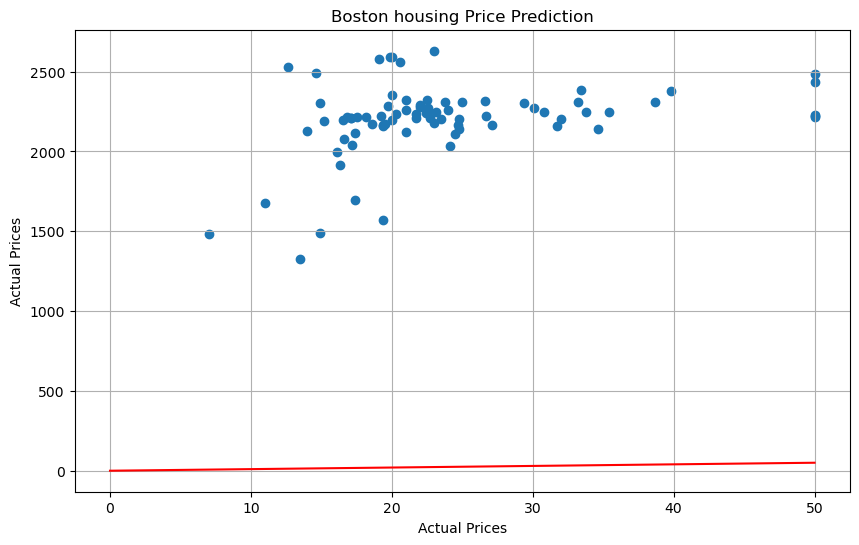

In [102]:
plt.figure(figsize=(10,6))
plt.scatter(y_test,predictions)
plt.xlabel("Actual Prices")
plt.ylabel("Actual Prices")
plt.title("Boston housing Price Prediction")
plt.plot([0,50],[0,50],color='red')
plt.grid(True)
plt.show()

In [103]:
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R² Score: {r2}")

Root Mean Squared Error (RMSE): 22.58437241113798
R² Score: -5.047130932685007
